### 1. Make a scatterplot of the highway miles per gallon (y-axis) versus the weight (x-axis).

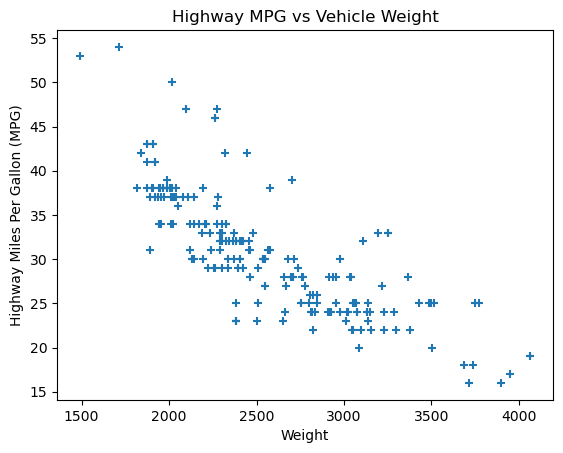

In [322]:
# import libraries
import numpy as np # library for working with matrices and arrays
import pandas as pd # library for working with data frames
import matplotlib.pyplot as plt # library for visualizations

# import data from the car_data.csv file
df_car_data = pd.read_csv("car_data.csv")

# extract data points for scatterplot
x = df_car_data["weight"]   # vehicle weight
y = df_car_data["hwy_mpg"]  # highway mpg

plt.scatter(x,y,marker="+") # create a scatter plot
plt.title("Highway MPG vs Vehicle Weight") # create the plot title
plt.xlabel("Weight") # create the x-axis label
plt.ylabel("Highway Miles Per Gallon (MPG)") # create the y-axis label
plt.show() # display the graph

### 2. Based on your plot, what is the general trend of how highway miles per gallon varies with the weight?

The scatterplot from problem (1) shows a negative correlation between weight and highway miles per gallon (MPG). As weight increases, highway MPG decreases showing a trend that heavier cars tend to have lower highway MPG.

### 3. If you were to build a linear model using this data to predict highway miles per gallon from weight, would you expect the slope to be positive or negative? Explain.

We would expect the slope to be negative because the data show that as vehicle weight increases, highway MPG consistently decreases. A negative slope in the model would capture this relationship, reflecting the trend that heavier cars tend to have lower highway MPG.

### 4. If the slope of a linear model predicting highway miles per gallon from the weight, interpret the meaning of the slope being −0.05.

A slope of −0.05 in this model means that for every one unit increase in vehicle weight (e.g., one pound), the predicted highway miles per gallon decreases by 0.05 MPG. Therefore, as a car gets heavier, the fuel efficiency on the highway is expected to decline at a rate of 0.05 MPG per unit of added weight.

### 5. Write code to add a line to the graph you made in problem (1). Adjust the slope and y-intercept of this line until you think you have found the line that best fits the data. Record the slope and y-intercept.

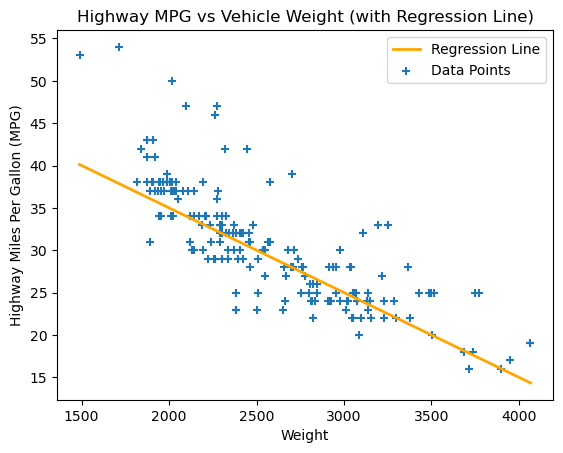

Slope: -0.0100
Y-Intercept: 55.0000


In [323]:
# import libraries
import numpy as np # library for working with matrices and arrays
import pandas as pd # library for working with data frames
import matplotlib.pyplot as plt # library for visualizations

# import data from the car_data.csv file
df_car_data = pd.read_csv("car_data.csv")

# extract data points for scatterplot
x = df_car_data["weight"]   # vehicle weight
y = df_car_data["hwy_mpg"]  # highway mpg

# Create points for a regression line
x_line = np.linspace(x.min(), x.max(), 205)
y_line = slope * x_line + intercept

# Adjust the slope and y-intercept values until the you have found the best fit line
slope = -0.010
intercept = 55

plt.plot(x_line, y_line, color="orange", linewidth=2, label="Regression Line") # plot the regression line
plt.scatter(x,y, marker="+", label="Data Points") # create a scatter plot
plt.title("Highway MPG vs Vehicle Weight (with Regression Line)") # create the plot title
plt.xlabel("Weight") # create the x-axis label
plt.ylabel("Highway Miles Per Gallon (MPG)") # create the y-axis label
plt.legend() # create the legend
plt.show() # display the graph

print(f"Slope: {slope:.4f}") # display slope value with 4 decimals
print(f"Y-Intercept: {intercept:.4f}") # display y-intercept value with 4 decimals

### 6. Use Python to find the best-fit (least-squares) line. The Scikit-learn package is a good choice to use for this.

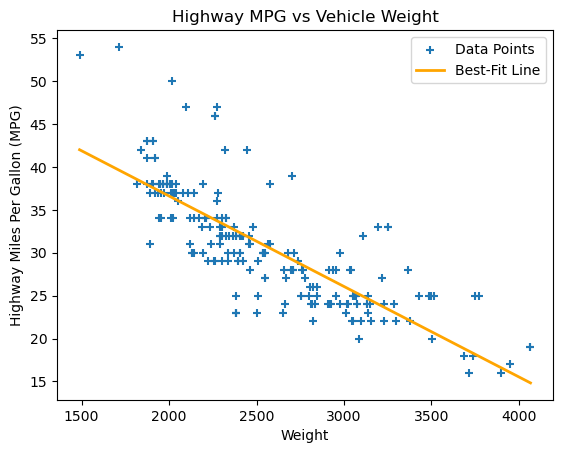

Slope: -0.0105
Y-Intercept: 57.7052


In [324]:
# import libraries
import numpy as np # library for working with matrices and arrays
import pandas as pd # library for working with data frames
import matplotlib.pyplot as plt # library for visualizations
from sklearn import linear_model  # library for machine learning, use Linear Regression

# import data from the car_data.csv file
df_car_data = pd.read_csv("car_data.csv")

# extract data points for scatterplot
x = df_car_data[["weight"]]   # vehicle weight
y = df_car_data["hwy_mpg"]    # highway mpg

model = linear_model.LinearRegression() # make a linear regression model object
model.fit(x,y) # train the model using weight and MPG data

slope = model.coef_[0] # slope of the regression line
intercept = model.intercept_ # y-intercept of the line

plt.scatter(x, y, marker="+", label="Data Points") # create a scatter plot
plt.title("Highway MPG vs Vehicle Weight")  # create the plot title
plt.xlabel("Weight") # create the x-axis label
plt.ylabel("Highway Miles Per Gallon (MPG)") # create the y-axis label

# add best-fit (least squares) line
x_line = np.linspace(x.min(), x.max(), 205) # generate values of weight across range
x_line_df = pd.DataFrame(x_line, columns=["weight"]) # put generated weight values into a dataframe with a column named weight
y_line = model.predict(x_line_df) # predict MPG for each generated weight
plt.plot(x_line, y_line, color='orange', linewidth=2, label="Best-Fit Line") # plot the best-fit line

plt.legend() # create the legend
plt.show() # display the graph

print(f"Slope: {slope:.4f}") # display slope value with 4 decimals
print(f"Y-Intercept: {intercept:.4f}") # display y-intercept with 4 decimals

### 7.  Find the root mean squared error (RMSE) of the prediction line you found in problem (5) and the actual best-fit line found in problem (6). How do these compare? Is this what you would expect?

In [325]:
# import libraries
import numpy as np # library for working with matrices and arrays
import pandas as pd # library for working with data frames
import matplotlib.pyplot as plt # library for visualizations
from sklearn import linear_model  # library for machine learning, use Linear Regression
from math import sqrt # library for math functions

# import data from the car_data.csv file
df_car_data = pd.read_csv("car_data.csv")

x = df_car_data[["weight"]]   # vehicle weight
y = df_car_data["hwy_mpg"]    # highway mpg

# manual line from problem (5)
slope_manual = -0.010
intercept_manual = 55
y_pred_manual = slope_manual * np.array(df_car_data["weight"]) + intercept_manual

# compute RMSE for manual line from problem (5)
mse_manual = np.mean((y - y_pred_manual) ** 2) # calculate mse using the squared differences of actual and predicted mpg values
rmse_manual = sqrt(mse_manual) # calculate rmse using square root of mse

# best-fit line from problem (6)
model = linear_model.LinearRegression() # make a linear regression model object
#model = LinearRegression() # make a linear regression model object
model.fit(x, y) # train (fit) the model using weight and MPG data
slope_fit = model.coef_[0] # slope of the regression line
intercept_fit = model.intercept_ # y-intercept of the line
y_pred_fit = model.predict(x) # predict MPG for each generated weight

# compute RMSE for best-fit line from problem (6)
mse_fit = np.mean((y - y_pred_fit) ** 2) # calculate mse using the squared differences of actual and predicted mpg values
rmse_fit = sqrt(mse_fit) # calculate rmse using square root of mse

# print RMSE results for problems (5) and (6)
print("Manual line from problem (5): y = -0.010*x + 55") # print the manual line
print(f"RMSE: {rmse_manual:.4f}\n") # print the RSME for the manual line
print(f"Best-fit line from problem (6): y = {slope_fit:.3f}*x + {intercept_fit:.3f}") # print the best-fit line
print(f"RMSE: {rmse_fit:.4f}") # print RSME for the best-ft line with 4 decimals

Manual line from problem (5): y = -0.010*x + 55
RMSE: 4.3553

Best-fit line from problem (6): y = -0.011*x + 57.705
RMSE: 4.1449


The best-fit line from problem (6) has a lower RMSE, which means it predicts highway MPG more accurately than the manual line found from problem (5). This is expected  because the best-fit line from linear regression is mathematically chosen to minimize the mean squared error (and therefore RMSE) across all data points.

### 8. Use the best-fit line in problem (6) to predict the highway mpg of a car that weighs 3200 pounds.

In [326]:
# Predict highway MPG for a car that weighs 3200 lbs
sample_car = pd.DataFrame({'weight': [3200]}) # create dataframe for sample car weighing 3200 pounds and column named weight
predicted_mpg = model.predict(sample_car) # predict MPG for the sample car
print(f"Predicted highway MPG for a car weighing 3200 pounds: {predicted_mpg[0]:.4f}") # print the predicted highway mpg with 4 decimals

Predicted highway MPG for a car weighing 3200 pounds: 23.9543
